                    TRABAJO PRÁCTICO NÚMERO 1 (ANALÍTICA DESCRIPTIVA)  -  DELITOS ARGENTINA

DATA WRANGLING

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
import json


#predeterminado

pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

#ver todo

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel('C:\\Dropbox\\delitos 14-22.xlsx',
                 parse_dates = {'Timestamp': [0]}, index_col = 0)


In [3]:
df = df.reset_index()
df['Timestamp'] = df['Timestamp'].dt.year

In [4]:
df.head(4)

,Timestamp,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,2,Ciudad Autónoma de Buenos Aires,1,Homicidios dolosos,185,200.0
1,2014,2,Ciudad Autónoma de Buenos Aires,2,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,2,Ciudad Autónoma de Buenos Aires,3,Muertes en Accidentes Viales,82,102.0
3,2014,2,Ciudad Autónoma de Buenos Aires,4,Homicidios culposos por otros hechos,23,24.0


In [5]:
df.shape

(10224, 7)

In [6]:
df.tail(4)

,Timestamp,provincia_id,provincia_nombre,codigo_delito_snic_id,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
10220,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",29_8,Otros delitos previstos en leyes especiales,3082,NaN
10221,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",30,Contravenciones,557,NaN
10222,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",31,Suicidios (consumados),22,22.0
10223,2022,94,"Tierra del Fuego, Antártida e Islas del Atlánt...",32,Delitos contra el orden económico y financiero,2,NaN


In [7]:
df2 = df.drop(['provincia_id', 'codigo_delito_snic_id'], axis=1)

In [8]:
df2.head(2)

,Timestamp,provincia_nombre,codigo_delito_snic_nombre,cantidad_hechos,cantidad_victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0


In [9]:
df3 = df2.rename(columns={'provincia_nombre':'Provincia',
                                   'codigo_delito_snic_nombre':'Delitos',
                                     'cantidad_hechos':'Hechos', 'cantidad_victimas':'Victimas'})


In [10]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [11]:
df3.dtypes

Timestamp      int32
Provincia     object
Delitos       object
Hechos         int64
Victimas     float64
dtype: object

In [12]:
df3.shape

(10224, 5)

                                                    ESTUDIO PERSONAL

TENEMOS UN DF3 CON 56 TIPOS DE DELITOS, CORRESPONDIENTES A TODAS LAS PROVINCIAS, DESDE EL 2014 HASTA EL 2022.

                            REALIZAR UN ESTUDIO ANALITICO SOBRE EL CRIMEN EN ARGENTINA

A) REEMPLAZAR LOS VALORES NAN POR VALORES 0.

B) CONVERTIR A LOS DECIMALES EN NUMEROS ENTEROS.

C) ORDENAR LOS DELITOS DE MAYOR A MENOR EN FUNCION DE LOS HECHOS Y VICTIMAS.

D) DETERMINAR CUALES SON LOS DELITOS CON MAYORES HECHOS PARA CADA PROVINCIA, POR CADA AÑO.

E) OBTENER QUE DELITOS TUVIEROS MAYORES VICTIMAS PARA CADA PROVINCIA, POR CADA AÑO.

F) DETERMINAR CUAL PROVINCIA FUE LA MAS DELICTIVA EN CADA AÑO.

G) OBTENER LA TOTALIDAD DE HECHOS Y VICTIMAS DE TODAS LAS PROVINCIAS POR CADA AÑO.

H) ¿CUAL ES DELITO PROMEDIO?, PROMEDIO DE HECHOS Y VICTIMAS ANUALES.

I) DETERMINAR LA CURVA DE AUMENTO O DESCENSO DE CRIMEN EN ARGENTINA. (AÑO MAS Y MENOS DELICTIVO)

J) ¿QUE PROVINCIAS MEJORARON Y CUALES EMPEORARON A LO LARGO DE LOS AÑOS?.

K) SEGUN TODA LA INFORMACION OBTENIDA REALIZAR GRAFICOS CON MATPLOTLIB O SEABORN.

In [13]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [14]:
df3.isnull().any()

Timestamp    False
Provincia    False
Delitos      False
Hechos       False
Victimas      True
dtype: bool

In [15]:
#A) Reemplazar valores nulos
df3 = df3.fillna(0)

In [16]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200.0
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68.0
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102.0
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24.0
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175.0
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562.0
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133.0
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623.0
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0.0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291.0


In [17]:
#B) Reemplazar valores float por valores int
df3['Victimas'] = df3['Victimas'].astype(int)

In [18]:
df3.head(30)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175
5,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas en Accidentes Viales,9009,10562
6,2014,Ciudad Autónoma de Buenos Aires,Lesiones culposas por otros hechos,2773,3133
7,2014,Ciudad Autónoma de Buenos Aires,Otros delitos contra las personas,533,623
8,2014,Ciudad Autónoma de Buenos Aires,Delitos contra el honor,0,0
9,2014,Ciudad Autónoma de Buenos Aires,Violaciones,267,291


In [19]:
# [Dataset recervado para estudios proximos]
dff = df3

In [20]:
dff

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175
...,...,...,...,...,...
10219,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Contrabando de elementos nucleares agresivos q...,0,0
10220,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Otros delitos previstos en leyes especiales,3082,0
10221,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Contravenciones,557,0
10222,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",Suicidios (consumados),22,22


In [21]:
#C) Ordernar los delitos en funcion de hechos y victimas.
#MAS DELITOS EN FUNCION DE HECHOS
delitos_sort_mayor = df3.groupby(by= ['Delitos'])['Hechos'].sum()
delitos_sort_mayor.sort_values(ascending= False)

Delitos
Robos (excluye los agravados por el resultado de lesiones y/o muertes)                          3694732
Hurtos                                                                                          2503450
Amenazas                                                                                        1687736
Lesiones dolosas                                                                                1362878
Otros delitos contra la propiedad                                                               1109023
Lesiones culposas en Accidentes Viales                                                           776442
Contravenciones                                                                                  772217
Otros delitos contra las personas                                                                456354
Delitos contra la administración pública                                                         373084
Otros delitos previstos en leyes especiales             

In [22]:
#MAS DELITOS EN FUNCION DE VICTIMAS
delitos_sort_mayor = df3.groupby(by= ['Delitos'])['Victimas'].sum()
delitos_sort_mayor.sort_values(ascending= False)

Delitos
Lesiones dolosas                                                                                1452886
Lesiones culposas en Accidentes Viales                                                           901287
Otros delitos contra las personas                                                                467099
Otros delitos contra la integridad sexual                                                        168225
Lesiones culposas por otros hechos                                                               127613
Otros delitos contra la libertad                                                                  78857
Violaciones                                                                                       44867
Muertes en Accidentes Viales                                                                      37921
Homicidios dolosos                                                                                22189
Suicidios (consumados)                                  

In [23]:
#D) # Determinar cuales son los 4 delitos con mayores hechos para cada provincia, por cada año.
delitos_prov_hechos = df3.groupby(by= ['Timestamp', 'Provincia','Delitos'])['Hechos'].sum()

for group_name, group_data in delitos_prov_hechos.groupby(level =[0,1]):
    print('Año', group_name[0])
    print('Provincia', group_name[1])
    print(group_data.nlargest(4))
    print('\n')


Año 2014
Provincia Buenos Aires
Timestamp  Provincia     Delitos                                                               
2014       Buenos Aires  Robos (excluye los agravados por el resultado de lesiones y/o muertes)    87215
                         Amenazas                                                                  58769
                         Lesiones dolosas                                                          57867
                         Hurtos                                                                    55526
Name: Hechos, dtype: int64


Año 2014
Provincia Catamarca
Timestamp  Provincia  Delitos                                                               
2014       Catamarca  Robos (excluye los agravados por el resultado de lesiones y/o muertes)    6479
                      Amenazas                                                                  5275
                      Lesiones dolosas                                                          469

In [24]:
#E) Obtener los 4 delitos con mayores victimas para cada provincia, por cada año.

delitos_prov_victimas = df3.groupby(by= ['Timestamp', 'Provincia','Delitos'])['Victimas'].sum()

for group_name, group_data in delitos_prov_victimas.groupby(level =[0,1]):
    print('Año', group_name[0])
    print('Provincia', group_name[1])
    print(group_data.nlargest(4))
    print('\n')

Año 2014
Provincia Buenos Aires
Timestamp  Provincia     Delitos                                  
2014       Buenos Aires  Lesiones dolosas                             64215
                         Lesiones culposas en Accidentes Viales       29013
                         Lesiones culposas por otros hechos           11279
                         Otros delitos contra la integridad sexual     2896
Name: Victimas, dtype: int32


Año 2014
Provincia Catamarca
Timestamp  Provincia  Delitos                                  
2014       Catamarca  Lesiones dolosas                             4698
                      Lesiones culposas en Accidentes Viales       3083
                      Otros delitos contra las personas            1069
                      Otros delitos contra la integridad sexual     275
Name: Victimas, dtype: int32


Año 2014
Provincia Chaco
Timestamp  Provincia  Delitos                                  
2014       Chaco      Lesiones dolosas                           

In [25]:
#F) Determinar cual fue la provincia mas delictiva en cada año.
resultados = []

for year, group in df3.groupby('Timestamp'):
    max_hechos_row = group['Hechos'].sum()
    max_victimas_row = group['Victimas'].sum()
    
    resultados.append({
        'Año': year,
        'Provincia con más hechos': group['Provincia'].values[0],
        'Hechos más altos': max_hechos_row,
        'Provincia con más víctimas': group['Provincia'].values[0],
        'Víctimas más altas': max_victimas_row
    })

resultados_df = pd.DataFrame(resultados)
resultados_df





,Año,Provincia con más hechos,Hechos más altos,Provincia con más víctimas,Víctimas más altas
0,2014,Ciudad Autónoma de Buenos Aires,1597471,Ciudad Autónoma de Buenos Aires,389754
1,2015,Ciudad Autónoma de Buenos Aires,1553996,Ciudad Autónoma de Buenos Aires,384499
2,2016,Ciudad Autónoma de Buenos Aires,1505672,Ciudad Autónoma de Buenos Aires,346066
3,2017,Ciudad Autónoma de Buenos Aires,1658123,Ciudad Autónoma de Buenos Aires,374387
4,2018,Ciudad Autónoma de Buenos Aires,1733799,Ciudad Autónoma de Buenos Aires,365147
5,2019,Ciudad Autónoma de Buenos Aires,1919503,Ciudad Autónoma de Buenos Aires,371498
6,2020,Ciudad Autónoma de Buenos Aires,1627348,Ciudad Autónoma de Buenos Aires,325463
7,2021,Ciudad Autónoma de Buenos Aires,1731131,Ciudad Autónoma de Buenos Aires,386529
8,2022,Ciudad Autónoma de Buenos Aires,1826630,Ciudad Autónoma de Buenos Aires,408904


In [26]:
#G) Obtener la totalidad de hechos y victimas de todas las provincias por cada año.
resultados_2 = []

for años, prov in df3.groupby(by= ['Timestamp', 'Provincia']):
    total_hechos = prov['Hechos'].sum()
    total_victimas = prov['Victimas'].sum()
    
    resultados_2.append({
        'Años': list(años)[0],
        'Provincias': prov.iloc[0]['Provincia'],
        'Hechos': total_hechos,
        'Víctimas': total_victimas
    })

resultados_df2 = pd.DataFrame(resultados_2)
resultados_df2

,Años,Provincias,Hechos,Víctimas
0,2014,Buenos Aires,396191,115139
1,2014,Catamarca,29523,9230
2,2014,Chaco,29961,5637
3,2014,Chubut,21378,4113
4,2014,Ciudad Autónoma de Buenos Aires,196284,36896
...,...,...,...,...
211,2022,Santa Cruz,14383,3292
212,2022,Santa Fe,127627,30311
213,2022,Santiago del Estero,36669,8512
214,2022,"Tierra del Fuego, Antártida e Islas del Atlánt...",11583,2462


In [27]:
# (EXTRA) PROVINCIA CON MAS VICTIMAS POR AÑO
resultados_2_1 = []

for años_1, prov in df3.groupby(['Timestamp']):
    provincia_max_victimas = prov.loc[prov['Victimas'].idxmax()]['Provincia']
    total_victimas = prov['Victimas'].max()
    
    resultados_2_1.append({
        'Año': años_1,
        'Provincia con Más Víctimas': provincia_max_victimas,
        'Total de Víctimas Máximo': total_victimas
    })

resultados_df2_2 = pd.DataFrame(resultados_2_1)

print(resultados_df2_2)


       Año Provincia con Más Víctimas  Total de Víctimas Máximo
0  (2014,)               Buenos Aires                     64215
1  (2015,)               Buenos Aires                     60557
2  (2016,)               Buenos Aires                     39427
3  (2017,)               Buenos Aires                     43984
4  (2018,)               Buenos Aires                     44142
5  (2019,)               Buenos Aires                     44730
6  (2020,)               Buenos Aires                     47930
7  (2021,)               Buenos Aires                     62969
8  (2022,)               Buenos Aires                     68450


In [28]:
# (EXTRA) PROMEDIO DE HECHOS Y VICTIMAS ANUALES
resultados_3 = []

for años2, delito in df3.groupby('Timestamp'):
    promedio_hechos = delito['Hechos'].mean()
    promedio_victimas = delito['Victimas'].mean()
    cant_delitos1 = delito['Delitos'].count()

    resultados_3.append({
        'Año': años2,
        'Media de Hechos': promedio_hechos,
        'Media de Victimas': promedio_victimas,
        'Cantidad de Delitos': cant_delitos1   
    })

resultados_df3 = pd.DataFrame(resultados_3)
resultados_df3

,Año,Media de Hechos,Media de Victimas,Cantidad de Delitos
0,2014,2218.709722,541.325000,720
1,2015,2158.327778,534.026389,720
2,2016,2091.211111,480.647222,720
3,2017,1233.722470,278.561756,1344
4,2018,1290.029018,271.686756,1344
5,2019,1428.201637,276.412202,1344
6,2020,1210.824405,242.159970,1344
7,2021,1288.043899,287.595982,1344
8,2022,1359.099702,304.244048,1344


In [29]:
#H) Delito promedio, en hechos y victimas
resultados_4 = []

for a, d in df3.groupby('Timestamp'):
    promedio_delito = d.groupby('Delitos')[['Hechos', 'Victimas']].mean()

    hecho_max = promedio_delito['Hechos'].idxmax()
    victim_max = promedio_delito['Victimas'].idxmax()

    resultados_4.append({
        'Año': a,
        'Delito promedio en hechos': hecho_max,
        'Delito promedio en victimas': victim_max
    })

resultado_df4 = pd.DataFrame(resultados_4)
resultado_df4

,Año,Delito promedio en hechos,Delito promedio en victimas
0,2014,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
1,2015,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
2,2016,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
3,2017,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
4,2018,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
5,2019,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
6,2020,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
7,2021,Robos (excluye los agravados por el resultado ...,Lesiones dolosas
8,2022,Robos (excluye los agravados por el resultado ...,Lesiones dolosas


In [30]:
df3.head()

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175


<Axes: xlabel='Timestamp'>

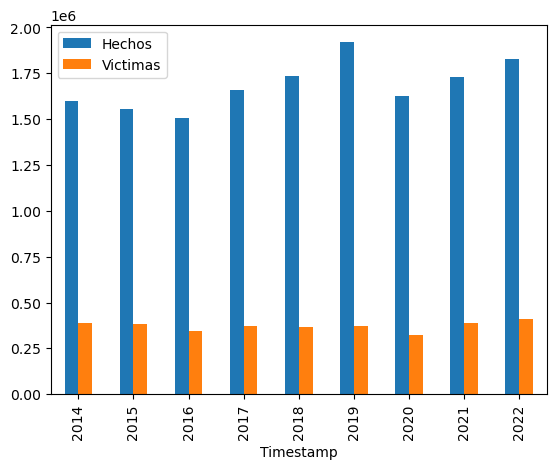

In [31]:
#I) Determinar la curva de aumento o descenso de crimen en Argentina. (Año mas y menos delictivo)
df_grouped = df3.groupby(df3['Timestamp'])[['Hechos', 'Victimas']].sum()
df_grouped.plot(kind='bar', legend= 'TotalHechos')

In [32]:
# Año mas delictivo en hechos
año_mas_hechos = df3.groupby('Timestamp')['Hechos'].sum()
año_mas_hechos = pd.DataFrame(año_mas_hechos)
año_mas_hechos.sort_values(by = 'Hechos', ascending=False).head(1)

,Hechos
Timestamp,
2019,1919503


In [33]:
# Año menos delictivo en hechos
año_mas_hechos.sort_values(by = 'Hechos', ascending=True).head(1)

,Hechos
Timestamp,
2016,1505672


In [34]:
# Año mas delictivo en victimas
año_mas_victimas = df3.groupby('Timestamp')['Victimas'].sum()
año_mas_victimas = pd.DataFrame(año_mas_victimas)
año_mas_victimas.sort_values(by = 'Victimas', ascending=False).head(1)

,Victimas
Timestamp,
2022,408904


In [35]:
# Año menos delictivo en victimas
año_mas_victimas.sort_values(by = 'Victimas', ascending=True).head(1)

,Victimas
Timestamp,
2020,325463


DATAFRAME CON PROVINCIAS COMO COLUMNAS

In [36]:
#provincias a lo largo de los años en funcion de hechos
sum_hechos = df3.groupby(['Timestamp', 'Provincia'])['Hechos'].sum()
data_prov_h = sum_hechos.unstack('Provincia')
data_prov_h.reset_index(inplace= True)
data_prov_h.set_index('Timestamp', inplace= True)
data_prov_h


Provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Buenos Aires,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,"Tierra del Fuego, Antártida e Islas del Atlántico Sur",Tucumán
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014,396191,29523,29961,21378,196284,26305,176400,36399,18487,24131,...,34109,33456,81493,22769,15463,12980,125963,15738,5745,55374
2015,386387,29189,25034,18713,175176,24008,167178,37530,17088,23088,...,33310,29393,86856,21561,13853,12757,126021,23828,6027,51890
2016,351469,30247,26445,23090,191165,21541,177584,39051,19282,20753,...,35784,29305,81699,23605,14057,13455,122939,27589,7012,52527
2017,398118,30496,32904,21202,185271,22463,184715,53290,20301,19156,...,36659,28931,134708,62997,13498,12286,121530,36723,10313,58702
2018,433851,26827,32633,22315,194657,21889,197167,55993,23212,22996,...,37333,28393,135617,61245,14071,12485,129879,41076,11220,57928
2019,529685,20638,33403,23889,221411,20502,206649,54381,26342,34742,...,39485,28284,167624,63090,15253,14032,128873,43954,12077,62696
2020,455152,15530,31087,21378,143383,17654,164078,51536,31890,32879,...,38939,28473,120788,71362,20766,12759,131637,31223,10246,55706
2021,515337,21915,30011,25425,181430,24996,163852,49140,25732,35371,...,35258,27043,133527,40762,16158,12930,130457,35406,11670,60979
2022,523534,22627,29338,24821,199007,26721,174417,48476,26071,43080,...,33514,26104,130821,29391,18075,14383,127627,36669,11583,88618


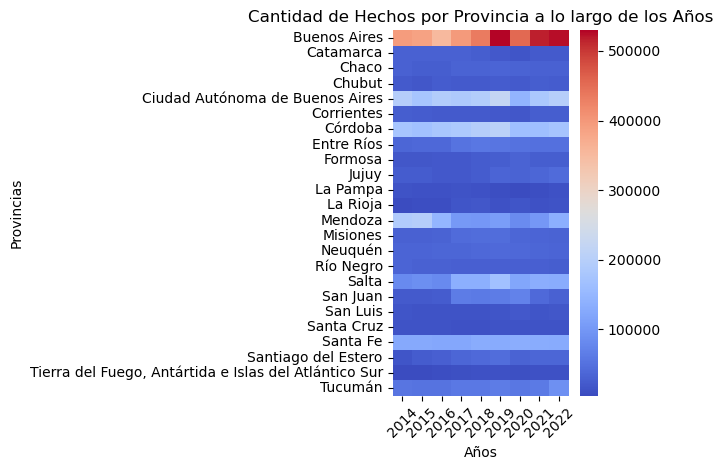

In [37]:
#J) Que provincias mejoraron y cuales empeoraron a lo largo de los años?
# K) Algunos graficos realizados sobre el annalisis personal.
data_prov_h = data_prov_h.transpose()
sns.heatmap(data_prov_h, cmap='coolwarm')
plt.xlabel('Años')
plt.ylabel('Provincias')
plt.title('Cantidad de Hechos por Provincia a lo largo de los Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
#provincias a lo largo de los años en funcion de victimas
sum_victimas = df3.groupby(['Timestamp', 'Provincia'])['Victimas'].sum()
data_prov_v = sum_victimas.unstack('Provincia')
data_prov_v.reset_index(inplace= True)
data_prov_v.set_index('Timestamp', inplace= True)
data_prov_v

Provincia,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Buenos Aires,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,"Tierra del Fuego, Antártida e Islas del Atlántico Sur",Tucumán
Timestamp,,,,,,,,,,,,,,,,,,,,,
2014,115139,9230,5637,4113,36896,5012,49192,11045,4118,3164,...,3092,4933,16721,3017,5276,2469,37727,5303,1371,19482
2015,113893,9749,5266,3823,35816,4989,46063,11145,4311,3150,...,3579,4178,18853,3216,4369,2085,35940,7137,1372,14968
2016,89513,9601,4940,5947,34970,3913,48879,11568,4927,2441,...,6030,3793,15611,3659,3670,2244,33276,7555,1565,13320
2017,94010,10025,6298,5371,47160,4733,53832,12044,5857,2331,...,5830,4845,19768,4064,3803,2397,34290,10119,1996,13490
2018,93979,7744,6363,5863,34424,4384,60870,10689,6111,4848,...,5582,4747,15238,4115,4025,2578,34201,10357,2547,13284
2019,96767,5899,6071,5919,37381,3110,56039,10340,5699,5727,...,5956,4919,21299,5594,4872,2949,30637,11179,2553,13342
2020,97934,4458,5971,5539,24953,2994,48466,9085,5496,4950,...,4524,3919,18153,4703,4204,2334,29459,8672,2111,10623
2021,131443,7138,6505,5689,28723,4220,45338,9935,5665,6236,...,4887,4078,19444,5403,3906,2612,31987,9647,2669,13408
2022,140212,7315,6446,4935,28862,5025,41874,8988,5818,7204,...,5670,4414,20892,5668,5450,3292,30311,8512,2462,18894


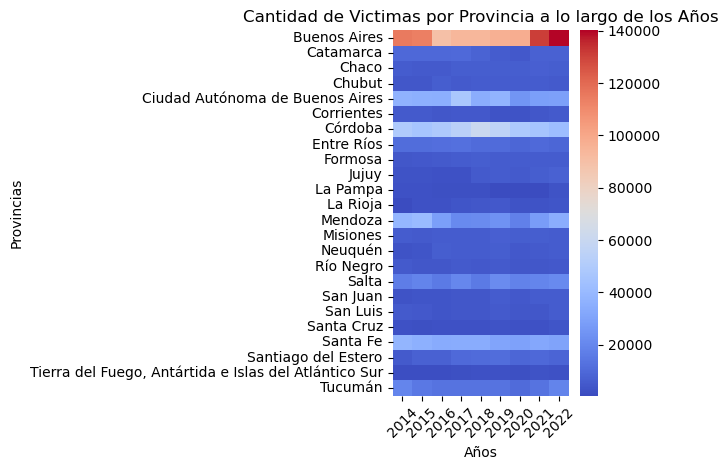

In [39]:
data_prov_v = data_prov_v.transpose()
sns.heatmap(data_prov_v, cmap='coolwarm')
plt.xlabel('Años')
plt.ylabel('Provincias')
plt.title('Cantidad de Victimas por Provincia a lo largo de los Años')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DATA EXTRA. REALIZAR UN DATAFRAME SIMILAR AL ANTERIOR PERO QUE LOS DATOS LLEVEN EL DELITO PROMEDIO DE CADA AÑO PARA CADA PROVINCIA.

In [40]:
resultados_dict = {}

for (timestamp, provincia), group in df3.groupby(['Timestamp', 'Provincia']):
    promedio_delito = group.groupby('Delitos')[['Hechos', 'Victimas']].mean()
    
    delito_max_hechos = promedio_delito['Hechos'].idxmax()
    delito_max_victimas = promedio_delito['Victimas'].idxmax()
    
    if timestamp not in resultados_dict:
        resultados_dict[timestamp] = {}
    resultados_dict[timestamp][provincia] = {
        delito_max_hechos:delito_max_victimas
    }

resultados_dff = pd.DataFrame(resultados_dict)
resultados_dff = resultados_dff.transpose()
resultados_dff



,Buenos Aires,Catamarca,Chaco,Chubut,Ciudad Autónoma de Buenos Aires,Corrientes,Córdoba,Entre Ríos,Formosa,Jujuy,...,Neuquén,Río Negro,Salta,San Juan,San Luis,Santa Cruz,Santa Fe,Santiago del Estero,"Tierra del Fuego, Antártida e Islas del Atlántico Sur",Tucumán
2014,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Lesiones dolosas': 'Lesiones dolosas'},{'Otros delitos contra la propiedad': 'Lesione...,{'Robos (excluye los agravados por el resultad...
2015,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Amenazas': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Lesiones dolosas': 'Lesiones dolosas'},{'Amenazas': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...
2016,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Amenazas': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Otros delitos previstos en leyes especiales'...,{'Robos (excluye los agravados por el resultad...
2017,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Contravenciones': 'Otros delitos contra las ...,{'Hurtos': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,...,{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Contravenciones': 'Lesiones dolosas'},{'Contravenciones': 'Lesiones dolosas'},{'Amenazas': 'Lesiones dolosas'},{'Robos (excluye los agravados por el resultad...,{'Robos (excluye los agravados por el resultad...,{'Hurtos': 'Lesiones dolosas'},{'Contravenciones': 'Otros delitos contra las ...,{'Amenazas': 'Lesiones dolosas'}
2018,{'Robos (excluye los agravados por el resultad.

                                                CONSIGNAS DE LA CLASE

1) TOTAL DE HECHOS POR AÑO
2) TOTAL DE VICTIMAS POR AÑO
3) TOTAL DE HECHOS POR DELITO
4) LA PROVINCIA CON MAS VICTIMAS
5) EL AÑO CON MAS HECHOS
6) TOTAL DE HECHOS POR PROVINCIA
7) HECHOS POR DELITO POR AÑO
8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS

In [41]:
#1) TOTAL DE HECHOS POR AÑO
resultados_3_1 = []

for añ, h in df3.groupby('Timestamp'):
    mas_hechos_1= h['Hechos'].sum()

    resultados_3_1.append({
        'Año': añ,
        'Total Hechos': mas_hechos_1  
    })

resultados_df3_1 = pd.DataFrame(resultados_3_1)
resultados_df3_1



,Año,Total Hechos
0,2014,1597471
1,2015,1553996
2,2016,1505672
3,2017,1658123
4,2018,1733799
5,2019,1919503
6,2020,1627348
7,2021,1731131
8,2022,1826630


In [42]:
#2) TOTAL DE VICTIMAS POR AÑO
resultados_3_1_1 = []

for añ_1, h_1 in df3.groupby('Timestamp'):
    mas_victim_1= h_1['Victimas'].sum()

    resultados_3_1_1.append({
        'Año': añ_1,
        'Total Victimas': mas_victim_1  
    })

resultados_df3_1_1 = pd.DataFrame(resultados_3_1_1)
resultados_df3_1_1

,Año,Total Victimas
0,2014,389754
1,2015,384499
2,2016,346066
3,2017,374387
4,2018,365147
5,2019,371498
6,2020,325463
7,2021,386529
8,2022,408904


<Axes: xlabel='Timestamp'>

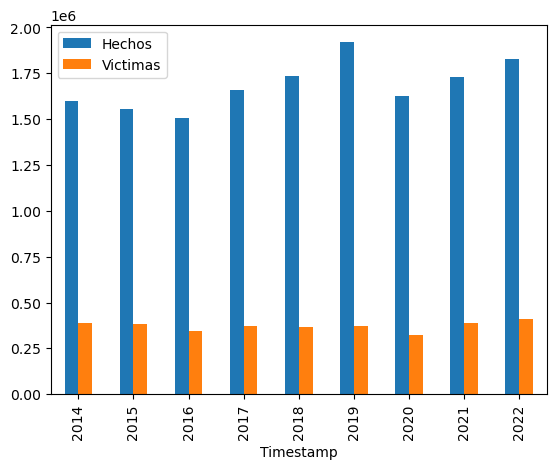

In [43]:
# GRAFICO
hechos_victimas_años = df3.groupby('Timestamp')[['Hechos', 'Victimas']].sum()
hechos_victimas_años.plot(kind='bar', legend= 'TotalHechos')

In [44]:
#3) TOTAL DE HECHOS POR DELITO
delitos_en_hechos = df3.groupby(by= ['Delitos'])['Hechos'].sum()
delitos_en_hechos.sort_values(ascending= False)

Delitos
Robos (excluye los agravados por el resultado de lesiones y/o muertes)                          3694732
Hurtos                                                                                          2503450
Amenazas                                                                                        1687736
Lesiones dolosas                                                                                1362878
Otros delitos contra la propiedad                                                               1109023
Lesiones culposas en Accidentes Viales                                                           776442
Contravenciones                                                                                  772217
Otros delitos contra las personas                                                                456354
Delitos contra la administración pública                                                         373084
Otros delitos previstos en leyes especiales             

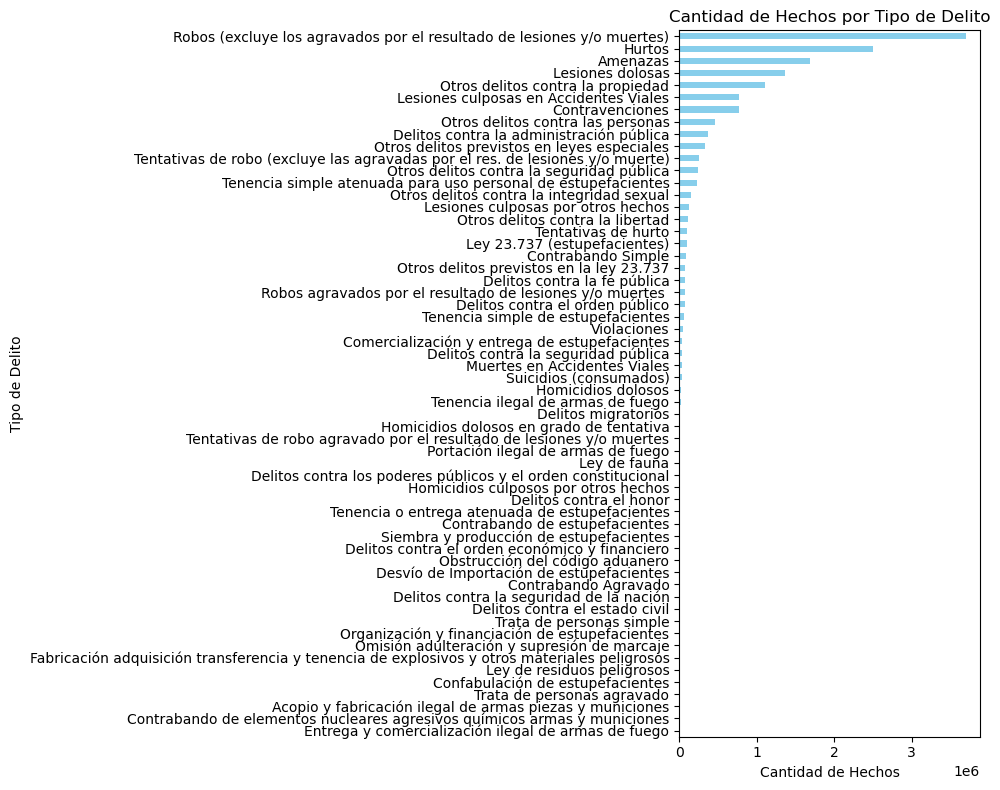

In [45]:
# GRAFICO
delitos_en_hechos = delitos_en_hechos.sort_values(ascending= True)
plt.figure(figsize=(10, 8))
delitos_en_hechos.plot(kind='barh', color='skyblue')
plt.xlabel('Cantidad de Hechos')
plt.ylabel('Tipo de Delito')
plt.title('Cantidad de Hechos por Tipo de Delito')
plt.tight_layout()

plt.show()

In [47]:
#4) LA PROVINCIA CON MAS VICTIMAS
resultados_2_1_1 = []

for prov_1_1, group_df in df3.groupby('Provincia'):
    total_victimas_1_1 = group_df['Victimas'].sum()
    
    resultados_2_1_1.append({
        'Provincias': prov_1_1,
        'Víctimas': total_victimas_1_1
    })

resultados_df2_2_2 = pd.DataFrame(resultados_2_1_1)
resultados_df2_2_2 = resultados_df2_2_2.set_index(resultados_df2_2_2['Provincias'])
resultados_df2_2_2 = resultados_df2_2_2.drop('Provincias', axis=1)
resultados_df2_2_2.sort_values(by = 'Víctimas', ascending= False).head(1)


,Víctimas
Provincias,
Buenos Aires,972890


In [48]:
#5) EL AÑO CON MAS HECHOS
resultados_df3_1.sort_values(by= 'Total Hechos', ascending= False).head(1)

,Año,Total Hechos
5,2019,1919503


In [49]:
#6) TOTAL DE HECHOS POR PROVINCIA
resultados_hechos_prov = []

for prov_hechos, grupo_hechos in df3.groupby('Provincia'):
    total_hechos_prov = grupo_hechos['Hechos'].sum()
    
    resultados_hechos_prov.append({
        'Provincias': prov_hechos,
        'Hechos': total_hechos_prov
    })

resultados_hechos_prov_df = pd.DataFrame(resultados_hechos_prov)
resultados_hechos_prov_df = resultados_hechos_prov_df.set_index(resultados_hechos_prov_df['Provincias'])
resultados_hechos_prov_df = resultados_hechos_prov_df.drop('Provincias', axis=1)
resultados_hechos_prov_df.sort_values(by = 'Hechos', ascending= False)

,Hechos
Provincias,
Buenos Aires,3989724
Ciudad Autónoma de Buenos Aires,1687784
Córdoba,1612040
Mendoza,1162345
Santa Fe,1144926
Salta,1073133
Tucumán,544420
Entre Ríos,425796
San Juan,396782


c:\Users\nicos\anaconda3\envs\Nicolas2023\lib\site-packages\geopandas\plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


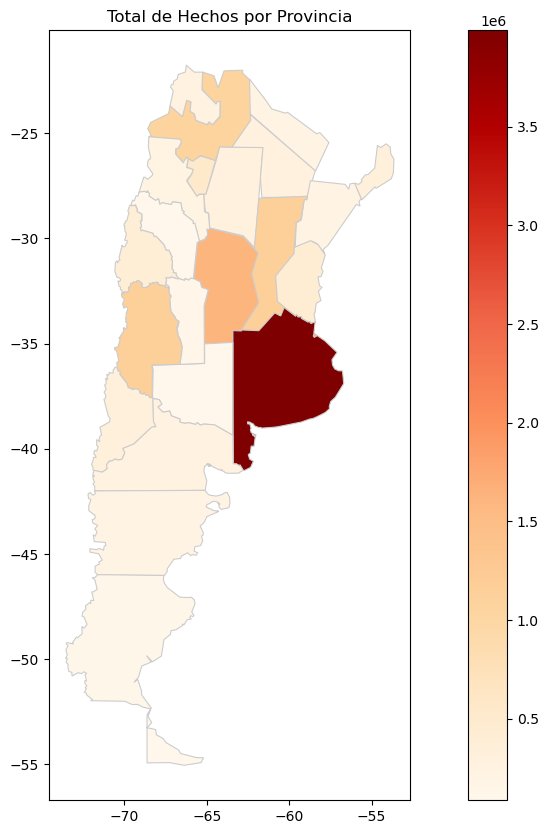

In [50]:
# GRAFICO
provin = gpd.read_file('C:\Dropbox\ProvinciasArgentina.geojson')

provin = provin.merge(resultados_hechos_prov_df, left_on='nombre', right_index=True)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
provin.plot(column='Hechos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total de Hechos por Provincia')
plt.show()

In [51]:
#7) HECHOS POR DELITO POR AÑO
delitos_en_hechos_años = df3.groupby(['Timestamp', 'Delitos'])['Hechos'].sum()
delitos_en_hechos_años

Timestamp  Delitos                                                                      
2014       Amenazas                                                                         184092
           Delitos contra el estado civil                                                      208
           Delitos contra el honor                                                             856
           Delitos contra el orden público                                                   15208
           Delitos contra la administración pública                                          30616
                                                                                             ...  
2022       Tentativas de robo (excluye las agravadas por el res. de lesiones y/o muerte)     24663
           Tentativas de robo agravado por el resultado de lesiones y/o muertes               1403
           Trata de personas agravado                                                           82
           Trata de 

In [52]:
#8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
lesiones_dolosas_df = df3[df3['Delitos'] == 'Lesiones dolosas']
provincia_delitos = lesiones_dolosas_df.groupby('Provincia')['Hechos'].sum()
top_3_provincias = provincia_delitos.sort_values(ascending= False)
top_3_provincias.head(3)

Provincia
Buenos Aires                       419184
Ciudad Autónoma de Buenos Aires    133658
Mendoza                            128034
Name: Hechos, dtype: int64

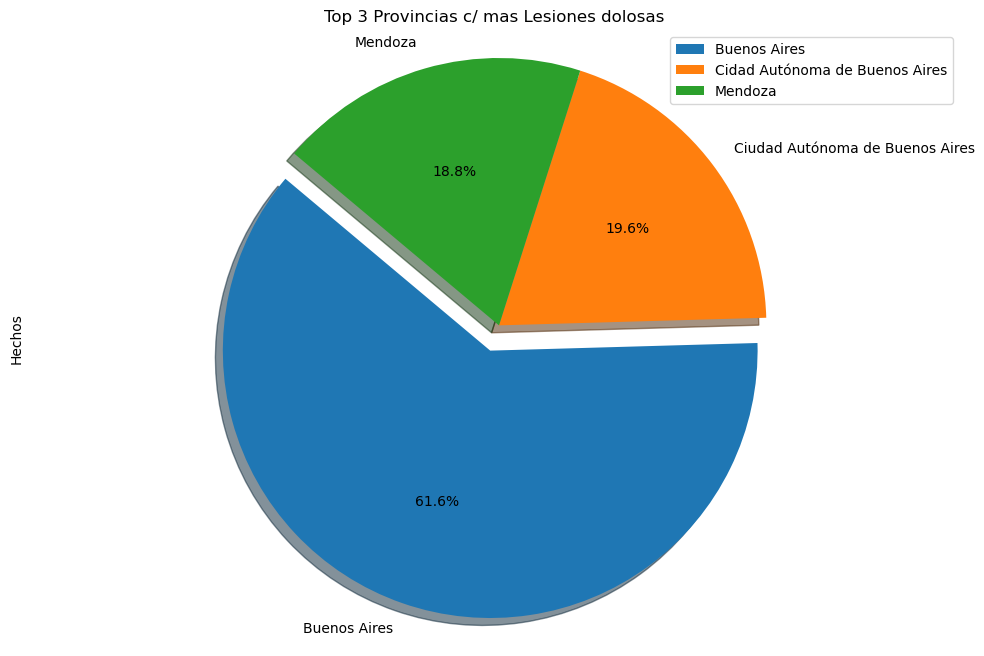

In [53]:
# GRAFICO
_lesiones_dolosas = df3[df3['Delitos'] == 'Lesiones dolosas']
total_lesiones_dolosas = _lesiones_dolosas.groupby('Provincia')['Hechos'].sum()
top_3_provin = total_lesiones_dolosas.sort_values(ascending=False).head(3)

plt.figure(figsize=(12,8))
explode = [0.1, 0.0, 0.00]
top_3_provin.plot(kind= 'pie', autopct='%1.1f%%', startangle = 140, explode=explode, shadow=True)
plt.title('Top 3 Provincias c/ mas Lesiones dolosas')
plt.legend(['Buenos Aires', 'Cidad Autónoma de Buenos Aires', 'Mendoza'])
plt.axis('equal')
plt.show()


In [54]:
#9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS
homicidios_culposos = df3[df3['Delitos'] == 'Homicidios culposos por otros hechos']
provincia_delitos_2 = homicidios_culposos.groupby('Provincia')[['Hechos','Victimas']].sum()
ranking_homicidios_culposos = provincia_delitos_2.sort_values(by= 'Victimas',ascending= False)
ranking_homicidios_culposos = ranking_homicidios_culposos.reset_index()
ranking_homicidios_culposos

,Provincia,Hechos,Victimas
0,Buenos Aires,1636,1849
1,Mendoza,1283,1332
2,Chaco,817,853
3,Tucumán,619,670
4,Santa Fe,295,336
5,Córdoba,278,295
6,Ciudad Autónoma de Buenos Aires,237,261
7,Formosa,165,165
8,Misiones,131,131
9,Corrientes,110,112


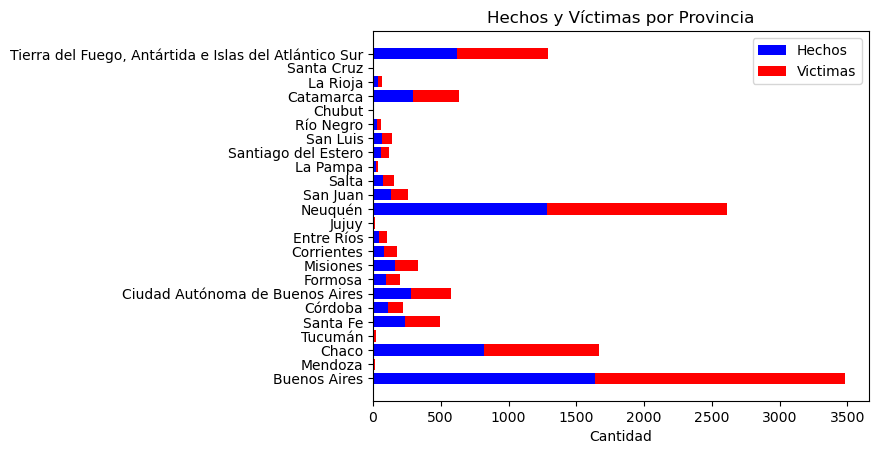

In [55]:
# GRAFICO
ranking_homicidios_culposos = pd.DataFrame(ranking_homicidios_culposos)

provinci = ranking_homicidios_culposos['Provincia'].tolist()
h = ranking_homicidios_culposos.groupby('Provincia')['Hechos'].sum()
v = ranking_homicidios_culposos.groupby('Provincia')['Victimas'].sum()

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Barra para hechos
ax.barh(provinci, h, color='blue', label='Hechos')

# Barra para víctimas
ax.barh(provinci, v, color='red', label='Victimas', left=h)

# Personalizar el gráfico
ax.set_xlabel('Cantidad')
ax.set_title('Hechos y Víctimas por Provincia')
ax.legend()

# Mostrar el gráfico
plt.show()


TRABAJAMOS CON SQLITE

In [56]:
import sqlite3
dfsq = df3

In [57]:
dfsq.head(2)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68


In [58]:
conn = sqlite3.connect('Delitos.db')

In [59]:
conn.execute('''CREATE TABLE IF NOT EXISTS delitos(Timestamp, date,
             Provincia str,
             Delitos str,
             Hechos int,
             Victimas int)''')

In [60]:
dfsq.to_sql('delitos', conn, if_exists='replace', index=False)

10224

In [61]:
dfsq = pd.read_sql_query('SELECT * from delitos', conn)
dfsq.head(5)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24
4,2014,Ciudad Autónoma de Buenos Aires,Lesiones dolosas,18679,21175


                                            CONSULTAS DE LA CLASE CON SQLIT3
1) TOTAL DE HECHOS POR AÑO
2) TOTAL DE VICTIMAS POR AÑO
3) TOTAL DE HECHOS POR DELITO
4) LA PROVINCIA CON MAS VICTIMAS
5) EL AÑO CON MAS HECHOS
6) TOTAL DE HECHOS POR PROVINCIA
7) HECHOS POR DELITO POR AÑO
8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS

In [62]:
#1)TOTAL DE HECHOS POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp' , conn)
dfsq


,Total Hechos,Timestamp
0,1597471,2014
1,1553996,2015
2,1505672,2016
3,1658123,2017
4,1733799,2018
5,1919503,2019
6,1627348,2020
7,1731131,2021
8,1826630,2022


In [63]:
#2) TOTAL DE VICTIMAS POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp' , conn)
dfsq

,Total Hechos,Timestamp
0,389754,2014
1,384499,2015
2,346066,2016
3,374387,2017
4,365147,2018
5,371498,2019
6,325463,2020
7,386529,2021
8,408904,2022


In [64]:
#3) TOTAL DE HECHOS POR DELITO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Delitos FROM delitos GROUP BY Delitos ORDER BY SUM(Hechos) DESC', conn)
dfsq

,Total Hechos,Delitos
0,3694732,Robos (excluye los agravados por el resultado ...
1,2503450,Hurtos
2,1687736,Amenazas
3,1362878,Lesiones dolosas
4,1109023,Otros delitos contra la propiedad
5,776442,Lesiones culposas en Accidentes Viales
6,772217,Contravenciones
7,456354,Otros delitos contra las personas
8,373084,Delitos contra la administración pública
9,339477,Otros delitos previstos en leyes especiales


In [65]:
#4) LA PROVINCIA CON MAS VICTIMAS
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Total Victimas", Provincia FROM delitos GROUP BY Provincia ORDER BY SUM(Victimas) DESC', conn)
dfsq.head(1)

,Total Victimas,Provincia
0,972890,Buenos Aires


In [66]:
#5) EL AÑO CON MAS HECHOS
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Timestamp FROM delitos GROUP BY Timestamp ORDER BY SUM(Hechos) DESC', conn)
dfsq.head(1)

,Total Hechos,Timestamp
0,1919503,2019


In [67]:
#6) TOTAL DE HECHOS POR PROVINCIA
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Provincia FROM delitos GROUP BY Provincia', conn)
dfsq

,Total Hechos,Provincia
0,3989724,Buenos Aires
1,226992,Catamarca
2,270816,Chaco
3,202211,Chubut
4,1687784,Ciudad Autónoma de Buenos Aires
5,206079,Corrientes
6,1612040,Córdoba
7,425796,Entre Ríos
8,208405,Formosa
9,256196,Jujuy


In [68]:
#7) HECHOS POR DELITO POR AÑO
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Total Hechos", Delitos, Timestamp FROM delitos GROUP BY Delitos, Timestamp', conn)
dfsq

,Total Hechos,Delitos,Timestamp
0,73,Acopio y fabricación ilegal de armas piezas y ...,2017
1,47,Acopio y fabricación ilegal de armas piezas y ...,2018
2,65,Acopio y fabricación ilegal de armas piezas y ...,2019
3,59,Acopio y fabricación ilegal de armas piezas y ...,2020
4,56,Acopio y fabricación ilegal de armas piezas y ...,2021
...,...,...,...
421,4141,Violaciones,2018
422,5461,Violaciones,2019
423,5616,Violaciones,2020
424,6794,Violaciones,2021


In [69]:
#8) TOP 3 DE PROVINCIAS CON MAS DELITOS POR LESIONES DOLOSAS
dfsq = pd.read_sql_query('SELECT SUM(Hechos) AS "Hechos", Delitos, Provincia FROM delitos WHERE Delitos LIKE "Lesiones dolosas" GROUP BY Provincia ORDER BY SUM(Hechos) DESC', conn)
dfsq.head(3)

,Hechos,Delitos,Provincia
0,419184,Lesiones dolosas,Buenos Aires
1,133658,Lesiones dolosas,Ciudad Autónoma de Buenos Aires
2,128034,Lesiones dolosas,Mendoza


In [70]:
#9) RANKING DE PROVINCIAS CON MAS HOMICIDIOS CULPOSOS
dfsq = pd.read_sql_query('SELECT SUM(Victimas) AS "Victimas", Delitos, Provincia FROM delitos WHERE Delitos LIKE "Homicidios culposos por otros hechos" GROUP BY Provincia ORDER BY SUM(Victimas) DESC', conn)
dfsq

,Victimas,Delitos,Provincia
0,1849,Homicidios culposos por otros hechos,Buenos Aires
1,1332,Homicidios culposos por otros hechos,Mendoza
2,853,Homicidios culposos por otros hechos,Chaco
3,670,Homicidios culposos por otros hechos,Tucumán
4,336,Homicidios culposos por otros hechos,Santa Fe
5,295,Homicidios culposos por otros hechos,Córdoba
6,261,Homicidios culposos por otros hechos,Ciudad Autónoma de Buenos Aires
7,165,Homicidios culposos por otros hechos,Formosa
8,131,Homicidios culposos por otros hechos,Misiones
9,112,Homicidios culposos por otros hechos,Corrientes


EMPIEZO CON GRAFICAS

In [71]:
df_g = dff

In [72]:
df_g.head(4)

,Timestamp,Provincia,Delitos,Hechos,Victimas
0,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos,185,200
1,2014,Ciudad Autónoma de Buenos Aires,Homicidios dolosos en grado de tentativa,54,68
2,2014,Ciudad Autónoma de Buenos Aires,Muertes en Accidentes Viales,82,102
3,2014,Ciudad Autónoma de Buenos Aires,Homicidios culposos por otros hechos,23,24


PRACTICA EXTRA DE GRAFICAS


<Axes: xlabel='Timestamp'>

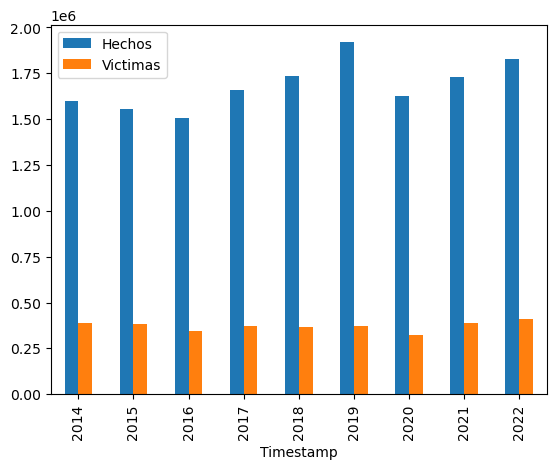

In [73]:
#HECHOS POR AÑO CON VICTIMAS Y HECHOS
df_grouped = df_g.groupby(df_g['Timestamp'])[['Hechos', 'Victimas']].sum()

df_grouped.plot(kind='bar', legend= 'TotalHechos')

<Axes: ylabel='Provincia'>

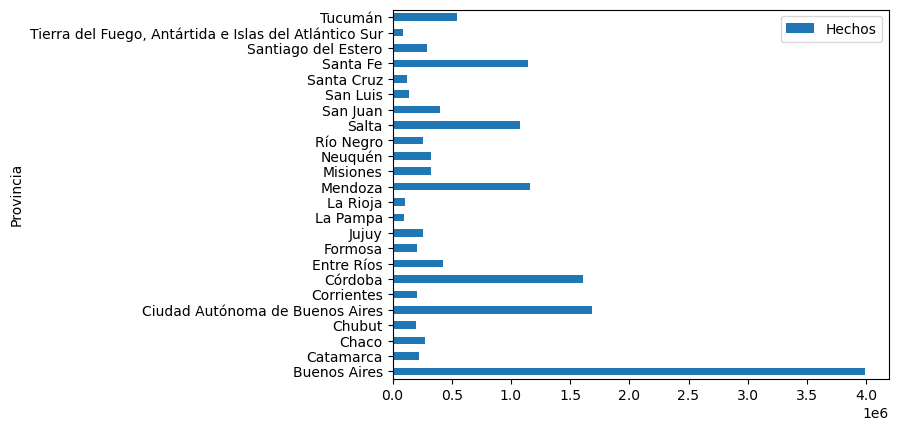

In [74]:
#HECHOS POR DELITO
df_g.groupby('Provincia')['Hechos'].sum().plot(kind='barh', legend='Años' )

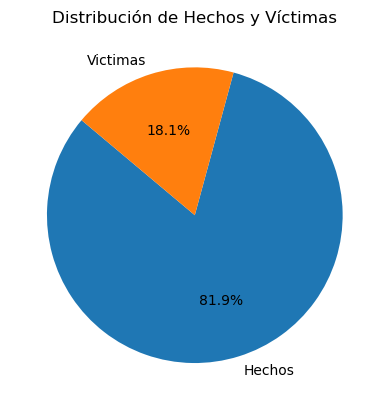

In [75]:
suma_hechos = df_g['Hechos'].sum()
suma_victimas = df_g['Victimas'].sum()
valores = [suma_hechos, suma_victimas]
categorias = ['Hechos', 'Victimas']
plt.pie(valores, labels= categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Hechos y Víctimas')
plt.show()


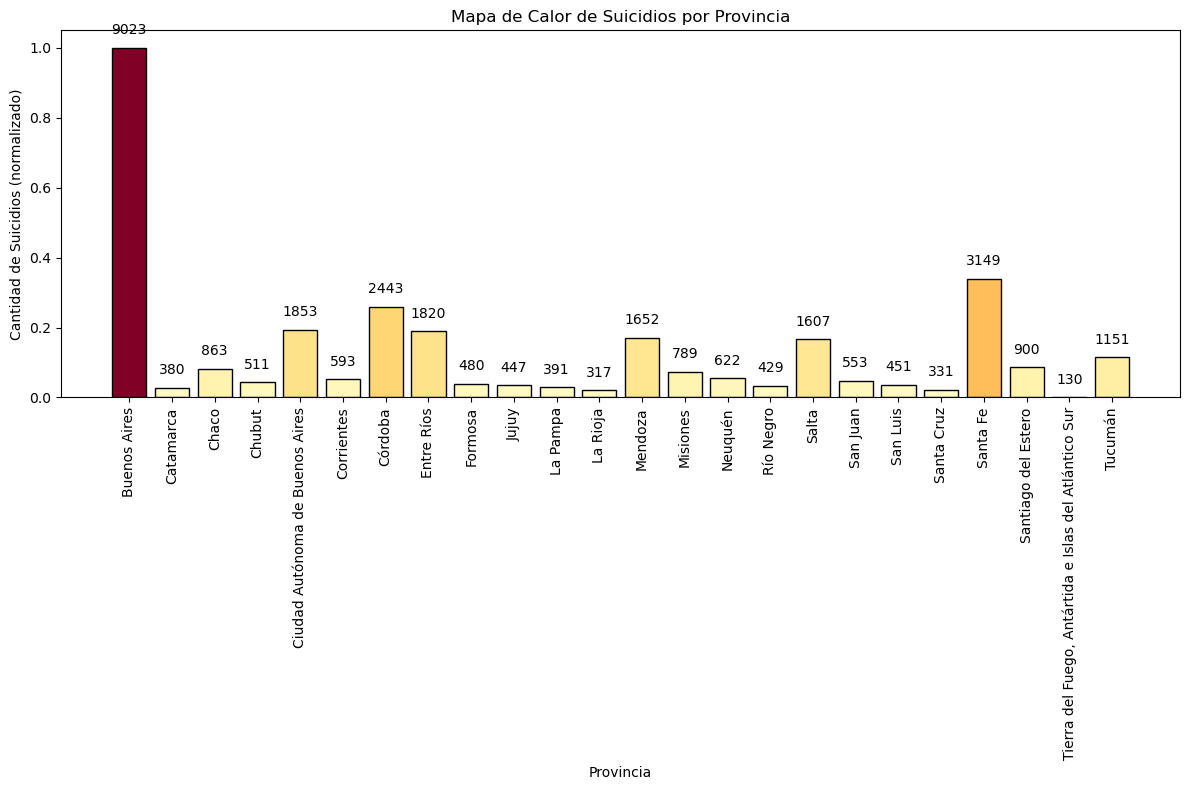

In [76]:
df_suicidios = df_g[df_g['Delitos'] == 'Suicidios (consumados)']

suicidios = df_suicidios.groupby('Provincia')['Hechos'].sum()

min_suicidios = suicidios.min()
max_suicidios = suicidios.max()
suicidios_normalized = (suicidios - min_suicidios) / (max_suicidios - min_suicidios)

plt.figure(figsize=(12, 8))

x = np.arange(len(suicidios_normalized))

for i, (provincia, valor_normalizado) in enumerate(zip(suicidios.index, suicidios_normalized)):
    color = plt.cm.YlOrRd(valor_normalizado)
    # Ajusta la altura de las barras según los valores normalizados
    plt.bar(i, valor_normalizado, color=color, label=provincia, edgecolor='k')
    plt.text(i, valor_normalizado + 0.05, str(suicidios[provincia]), ha='center', va='center', fontsize=10)

plt.xticks(x, suicidios.index, rotation=90, fontsize=10)  
plt.title('Mapa de Calor de Suicidios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Suicidios (normalizado)')
plt.tight_layout()

plt.show()





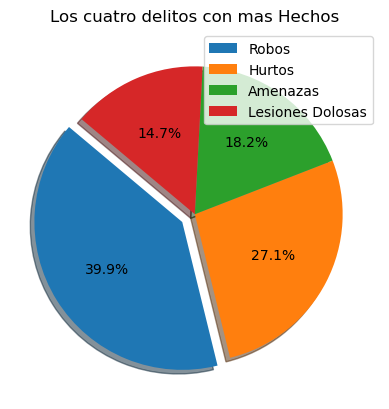

In [77]:
#LOS 4 DELITOS CON MAS HECHOS
# 1 Robos (excluye los agravados por el resultado de lesiones y/o muertes)
# 2 Hurtos
# 3 Amenazas
# 4 Lesiones dolosas
robos = df_g[df_g['Delitos'] == 'Robos (excluye los agravados por el resultado de lesiones y/o muertes)']
hurtos = df_g[df_g['Delitos'] == 'Hurtos']
amenazas = df_g[df_g['Delitos'] == 'Amenazas']
lesiones_dolosas = df_g[df_g['Delitos'] == 'Lesiones dolosas']
suma_robos = robos['Hechos'].sum()
suma_hurtos = hurtos['Hechos'].sum()
suma_amenazas = amenazas['Hechos'].sum()
suma_lesiones_d = lesiones_dolosas['Hechos'].sum()
valores = [suma_robos, suma_hurtos, suma_amenazas, suma_lesiones_d]
categorias = ['Robos', 'Hurtos', 'Amenazas', 'Lesiones Dolosas']
explode = [0.1, 0.0, 0.0, 0.00]
plt.pie(valores, autopct='%1.1f%%', startangle=140, explode= explode, shadow= True)
plt.title('Los cuatro delitos con mas Hechos')
plt.legend(categorias)
plt.show()



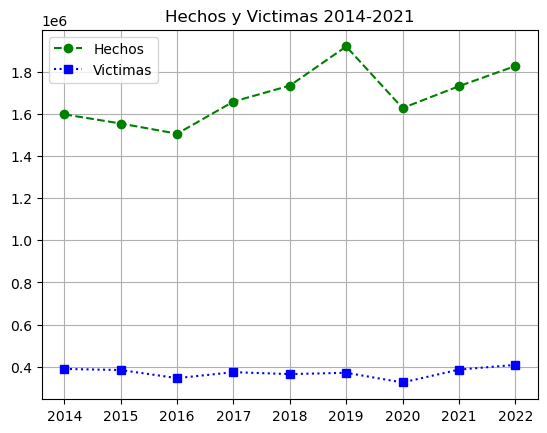

In [78]:
valoresAY = df_g.groupby('Timestamp')['Hechos'].sum()
valoresBY = df_g.groupby('Timestamp')['Victimas'].sum()
valoresX = [2014,2015,2016,2017,2018,2019,2020,2021,2022]
fig, ax = plt.subplots()
plt.plot(valoresX, valoresAY, "o--g")
plt.plot(valoresX, valoresBY, "s:b")
plt.title('Hechos y Victimas 2014-2021')
plt.legend(['Hechos', 'Victimas'])
plt.grid(True)
plt.show()